In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import keras 
from keras.datasets import cifar10
from keras import backend as K
from keras.models import Sequential 
from keras.models import model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline 

Using TensorFlow backend.


In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       204928    
__________

(5, 5, 3, 64)


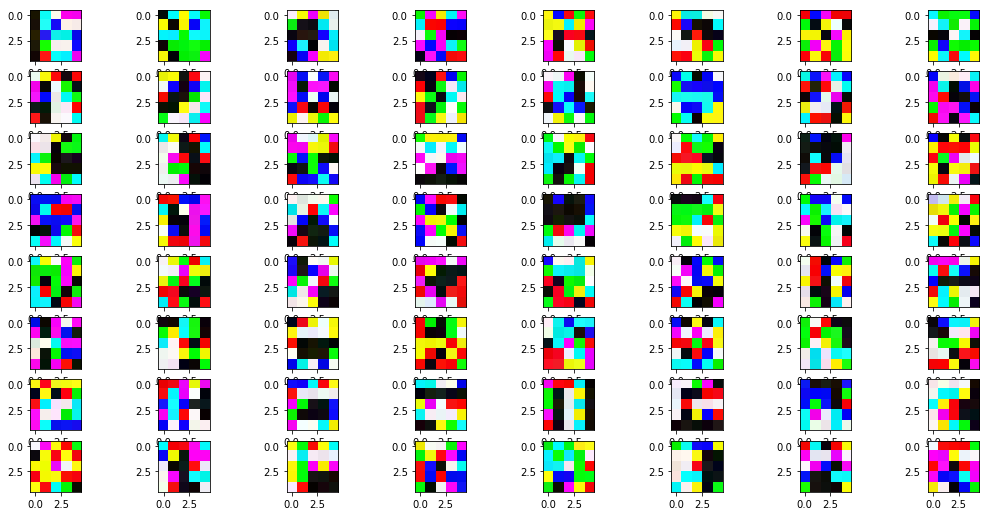

In [15]:
layer1_params = loaded_model.layers[0].get_weights()
layer1_weights = layer1_params[0]

def plot_raw_weights(weights):
    plt.figure(figsize=(18, 10))
    num_filters = weights.shape[3]
    for i in range(num_filters):
        plt.subplot(int(num_filters/8)+1, 8, i+1)
        plt.imshow(weights[:, :, :, i])
    plt.show()

print(layer1_weights.shape)
plot_raw_weights(layer1_weights)